### Import Necessary Libaries.

In [1]:
import pandas as pd 
import numpy as np

### `Q-1:` You are given a Multi index DataFrame. You task is to swap level-0 index with level-0 column.
* Change Branch -> ('cse', 'ece') as columns at level-0 and ('delhi'	'mumbai') as level-0 Index
* And Sort on row index level-0

In [2]:
multi_index = pd.MultiIndex.from_product([['CSE', 'ECE'], [2019, 2020, 2021, 2022]])

branch_df = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index=multi_index, 
    columns = pd.MultiIndex.from_product([['Delhi', 'Mumbai'], ['Avg_package', 'Students']])
)

branch_df

Delhi               Mumbai         
         Avg_package Students Avg_package Students
CSE 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ECE 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [3]:
# solution 1 
branch_df.transpose().stack(future_stack=True).swaplevel().unstack()

CSE                  ECE         
            Avg_package Students Avg_package Students
Delhi  2019           1        2           9       10
       2020           3        4          11       12
       2021           5        6          13       14
       2022           7        8          15       16
Mumbai 2019           0        0           0        0
       2020           0        0           0        0
       2021           0        0           0        0
       2022           0        0           0        0

In [4]:
# solution 2
branch_df.unstack(level=0).stack(future_stack = True, level = 0).swaplevel().swaplevel(axis = 1).sort_index()

CSE         ECE      CSE      ECE
            Avg_package Avg_package Students Students
Delhi  2019           1           9        2       10
       2020           3          11        4       12
       2021           5          13        6       14
       2022           7          15        8       16
Mumbai 2019           0           0        0        0
       2020           0           0        0        0
       2021           0           0        0        0
       2022           0           0        0        0

### `Q-2:` Covid Cases Data Set Problem
 Make a DataFrame Using both Covid Dataset. With Country name as Level-0 and Provinance/State as Level-1 Index and date, No of cases and No of Deaths as Columns.

In [5]:
death = pd.read_csv('./Datasets/time_series_covid19_deaths_global.csv')
confirm = pd.read_csv('./Datasets/time_series_covid19_confirmed_global.csv')

In [6]:
death.sample()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
87,Tianjin,China,39.3054,117.323,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3


In [7]:
death.sample()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
139,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,19992,19993,19994,19995,19997,19998,20000,20001,20002,20003


In [8]:
death = death.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='num_death')
confirm = confirm.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='num_cases')
death_confirm_df = confirm.merge(death, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])[['Province/State', 'Country/Region', 'Date', 'num_cases', 'num_death']]

In [9]:
death_confirm_df

,Province/State,Country/Region,Date,num_cases,num_death
0,NaN,Afghanistan,1/22/20,0,0
1,NaN,Albania,1/22/20,0,0
2,NaN,Algeria,1/22/20,0,0
3,NaN,Andorra,1/22/20,0,0
4,NaN,Angola,1/22/20,0,0
...,...,...,...,...,...
311248,NaN,West Bank and Gaza,1/2/23,703228,5708
311249,NaN,Winter Olympics 2022,1/2/23,535,0
311250,NaN,Yemen,1/2/23,11945,2159
311251,NaN,Zambia,1/2/23,334661,4024


In [10]:
multi_index_df = death_confirm_df.set_index(['Country/Region', 'Province/State']).sort_index()
multi_index_df

Date  num_cases  num_death
Country/Region Province/State                                
Afghanistan    NaN              1/22/20          0          0
               NaN              1/23/20          0          0
               NaN              1/24/20          0          0
               NaN              1/25/20          0          0
               NaN              1/26/20          0          0
...                                 ...        ...        ...
Zimbabwe       NaN             12/29/22     259981       5637
               NaN             12/30/22     259981       5637
               NaN             12/31/22     259981       5637
               NaN               1/1/23     259981       5637
               NaN               1/2/23     259981       5637

[311253 rows x 3 columns]

### `Q-3:` Show Country with Highest death percent out of confirmed Cases. 

In [11]:
num_cases = death_confirm_df.groupby('Country/Region')['num_cases'].sum()
num_cases

Country/Region
Afghanistan             116218938
Albania                 163505982
Algeria                 164830894
Andorra                  21390392
Angola                   53083822
                          ...    
West Bank and Gaza      366130648
Winter Olympics 2022       179152
Yemen                     7091065
Zambia                  173488194
Zimbabwe                123084606
Name: num_cases, Length: 201, dtype: int64

In [12]:
num_death = death_confirm_df.groupby('Country/Region')['num_death'].sum()
num_death

Country/Region
Afghanistan             4901323
Albania                 2248012
Algeria                 4447129
Andorra                  116300
Angola                  1104387
                         ...   
West Bank and Gaza      3377981
Winter Olympics 2022          0
Yemen                   1372952
Zambia                  2364727
Zimbabwe                3087612
Name: num_death, Length: 201, dtype: int64

In [13]:
((num_death / num_cases) * 100).sort_values(ascending=False).reset_index()

,Country/Region,0
0,"Korea, North",600.000000
1,MS Zaandam,22.202624
2,Yemen,19.361718
3,Sudan,7.360250
4,Peru,7.092370
...,...,...
196,Antarctica,0.000000
197,Holy See,0.000000
198,Summer Olympics 2020,0.000000
199,Tuvalu,0.000000


`NOTE : ` Here in above data their is an issue 600% death/cases ration

### `Q-4` : Make a dataframe for India from Covid Data with one extra column representing no of new cases. 

* Just for Assumption "No of new cases" will be equal to difference of "no of cases" with previous day.
* First day new cases will be NaN or equal to no of cases

Say on 12/30/22 No of cases is - 44679608	and a day previous (12/29/22) no of cases is - 44679382.

Then for 12/30/22 -> No of New Cases  = 44679608 - 44679382 = 

Note:- Try using shift Function

Try using the shift function

```
s = pd.Series([1,2,3,4,5,6])
s #-> [1,2,3,4,5,6]
s.shift(1) #-> [NaN, 1,2,3,4,5]
s.shift(-1) #-> [2,3,4,5,6, NaN]

```

In [33]:
india_df = multi_index_df.loc['India'].copy()
india_df['new_cases'] = india_df['num_cases'] - india_df['num_cases'].shift(1)
india_df

,Date,num_cases,num_death,new_cases
Province/State,,,,
NaN,1/22/20,0,0,NaN
NaN,1/23/20,0,0,0.0
NaN,1/24/20,0,0,0.0
NaN,1/25/20,0,0,0.0
NaN,1/26/20,0,0,0.0
...,...,...,...,...
NaN,12/29/22,44679382,530699,243.0
NaN,12/30/22,44679608,530702,226.0
NaN,12/31/22,44679873,530705,265.0


### `Q-5:` Read the Dataset using the below given link and create a multi-index dataframe using the columns "Country" and "City/Town". 

This dataset is about the most polluted cities in the world. You can get details from [here](https://www.kaggle.com/datasets/rajkumarpandey02/worlds-most-air-polluted-countries-cities).

**Dataset link:** https://tinyurl.com/2fe6vz4u Directly use this link to read.

**Task:**
1. Find out the name of the city of India which is most poluted based on PM10.
2. Find out the name of the city of India which has minumum pollution level based on PM10.
3. Do same operations (like 1 and 2) with the country China.
4. Make a pie chart based on the column "PM10" of the country Poland.
5. Make a bar chart based on the columns "PM2.5" and "PM10" of the countries Israel and Qatar.
6. Convert this MultiIndex DataFrame to Series by retaining the informations.

In [96]:
polluted_cities_df = pd.read_csv('./Datasets/List of most-polluted cities by particulate matter concentration.csv')
polluted_cities_df.sample(5)

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
236,236,237,China,Wendeng,2014,46,NaN,69,NaN,2016
105,105,106,China,Ezhou,2016,60,NaN,100,NaN,2018
123,123,124,China,Yibin,2015,58,NaN,82,NaN,2018
78,78,79,Bangladesh,Chittagong,2015,66,50% -< 75%,91,>75%,2018
385,385,386,Iran,Eslamshahr,2016,32,NaN,73,NaN,2018


In [97]:
polluted_cities_df.set_index(['Country', 'City/Town'], inplace=True)
polluted_cities_df

Unnamed: 0  Position  Year  PM2.5 Temporal coverage  \
Country     City/Town                                                           
India       Kanpur                 0         1  2016    173              >75%   
            Faridabad              1         2  2016    172              >75%   
            Gaya                   2         3  2016    149        50% -< 75%   
            Varanasi               3         4  2016    146              >75%   
            Patna                  4         5  2016    144              >75%   
...                              ...       ...   ...    ...               ...   
Poland      Lublin               495       496  2016     27              >75%   
            Siedlce              496       497  2016     27              >75%   
            Trzebinia            497       498  2016     27              >75%   
El Salvador San Salvador         498       499  2016     27        50% -< 75%   
Turkey      Sivas                499       500  2016     27              >75%   

                          PM10 Temporal coverage.1  Database version (year)  
Country     City/Town                                                        
India       Kanpur         319                 NaN                     2018  
            Faridabad      316                 NaN                     2018  
            Gaya           275                 NaN                     2018  
            Varanasi       260                 NaN                     2018  
            Patna          266                 NaN                     2018  
...                        ...                 ...                      ...  
Poland      Lublin          31                >75%                     2018  
            Siedlce         29                >75%                     2018  
            Trzebinia       35                >75%                     2018  
El Salvador San Salvador    59                 NaN                     2018  
Turkey      Sivas           56                >75%                     2018  

[500 rows x 8 columns]

In [90]:
# Question 1
polluted_cities_df.loc['India'].sort_values('PM10', ascending = False).head()

,Unnamed: 0,Position,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
City/Town,,,,,,,,
Kanpur,0,1,2016,173,>75%,319,NaN,2018
Faridabad,1,2,2016,172,>75%,316,NaN,2018
Delhi,5,6,2016,143,>75%,292,NaN,2018
Gaya,2,3,2016,149,50% -< 75%,275,NaN,2018
Patna,4,5,2016,144,>75%,266,NaN,2018


In [91]:
# Question 1
polluted_cities_df.loc['India'].sort_values('PM10', ascending = True).head()

,Unnamed: 0,Position,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
City/Town,,,,,,,,
Aizawl,483,484,2016,27,NaN,44,NaN,2018
Thiruvananthapuram,345,346,2016,35,NaN,48,NaN,2018
Tezpur,365,366,2016,33,NaN,52,NaN,2018
Navi Mumbai,289,290,2016,41,NaN,67,NaN,2018
Solapur,305,306,2016,39,>75%,71,NaN,2018


In [92]:
# Question 2
polluted_cities_df.loc['China'].sort_values('PM10', ascending=False).head()

,Unnamed: 0,Position,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
City/Town,,,,,,,,
Jinan,21,22,2014,90,NaN,192,NaN,2018
Xingtai,25,26,2016,87,NaN,186,NaN,2018
Handan,33,34,2016,82,NaN,175,NaN,2018
Linfen,51,52,2016,74,NaN,158,NaN,2018
Anyang,26,27,2016,86,NaN,155,NaN,2018


In [93]:
# Question 2
polluted_cities_df.loc['China'].sort_values('PM10', ascending=True).head()

,Unnamed: 0,Position,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
City/Town,,,,,,,,
Anshun,476,477,2016,27,NaN,38,NaN,2018
Shenzhen,481,482,2016,27,NaN,42,NaN,2018
Eerduosi,451,452,2014,28,NaN,42,NaN,2016
Putian,435,436,2016,29,NaN,43,NaN,2018
Zhongshan,416,417,2016,30,NaN,44,NaN,2018


<Axes: ylabel='PM10'>

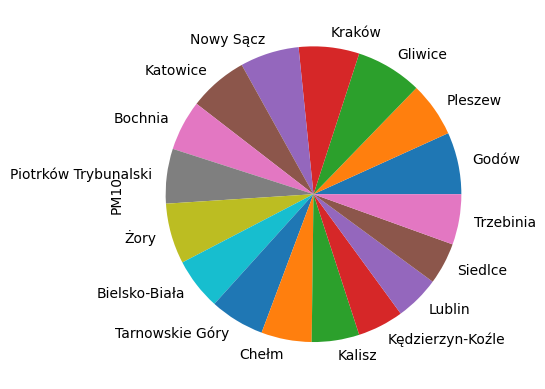

In [107]:
# Question 4
polluted_cities_df.loc['Poland']['PM10'].plot(kind='pie')

<Axes: xlabel='Country,City/Town'>

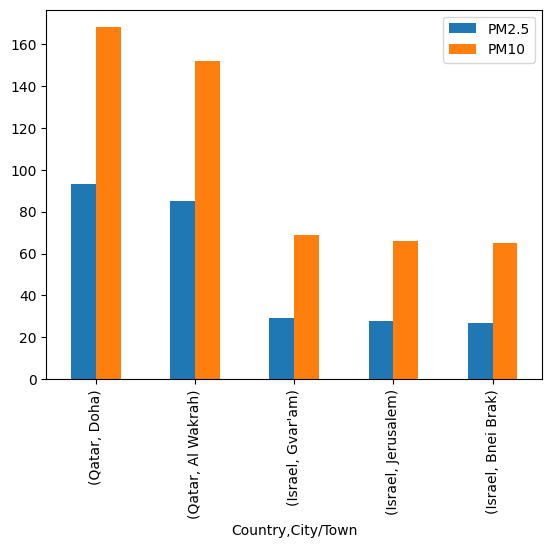

In [114]:
# Question 5
polluted_cities_df.loc[['Qatar', 'Israel']][['PM2.5', 'PM10']].plot(kind='bar')

In [118]:
# Question 6 
polluted_cities_df.stack()

Country  City/Town                         
India    Kanpur     Unnamed: 0                    0
                    Position                      1
                    Year                       2016
                    PM2.5                       173
                    Temporal coverage          >75%
                                               ... 
Turkey   Sivas      PM2.5                        27
                    Temporal coverage          >75%
                    PM10                         56
                    Temporal coverage.1        >75%
                    Database version (year)    2018
Length: 3138, dtype: object